In [1]:
#importing libraries
import pandas as pd
import statistics as stats
from scipy.stats import binom
import scipy.stats as st
from scipy.stats import norm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
#loading the dataset
customer_df = pd.read_csv("CA1_business_dataset.csv")

In [3]:
#taking a look at the first 10 observations
customer_df.head(10)

,Customer Satisfaction Score,Response Time,Daily User Logins,Average Session Duration,Survey Response Rate,Transaction Amount,Product Rating,Preferred Communication Channel,Membership Status,Product Category Preference,...,Referral Count,Account Age,Feedback Score,Product Return Rate,Marketing Email Click Rate,Subscription Status,Product Upsell Success,Customer Segment Group,Interest in New Product,Income Level
0,37,95.07,73,59.87,15.60,15.60,6,Email,Yes,Basic,...,18,30,52,Yes,29.12,1,1,C,No,High
1,79,19.97,51,59.24,4.65,60.75,17,Phone,Yes,Gold,...,12,50,3,No,25.88,1,1,C,No,Low
2,97,77.51,94,89.48,59.79,92.19,9,SMS,Yes,Platinum,...,54,14,80,Yes,98.69,1,1,C,No,Low
3,73,77.13,7,35.85,11.59,86.31,62,Email,Yes,Platinum,...,12,71,76,No,77.10,0,1,C,No,Low
4,3,63.64,31,50.86,90.76,24.93,41,Phone,Yes,Platinum,...,87,80,19,No,53.93,1,0,D,Yes,Medium
5,43,81.80,86,0.70,51.07,41.74,22,SMS,Yes,Gold,...,96,25,50,No,28.48,1,1,D,No,High
6,91,23.96,14,48.95,49.61,50.25,50,Email,Yes,Gold,...,84,32,19,No,59.09,0,1,B,Yes,Low
7,17,69.09,39,93.67,49.61,50.25,50,Phone,Yes,Platinum,...,9,90,90,No,33.90,1,0,C,Yes,Low
8,64,8.41,16,89.86,60.64,0.92,10,SMS,Yes,Basic,...,24,33,75,No,84.92,0,1,D,Yes,Medium
9,24,97.30,39,89.20,49.61,50.25,50,Email,Yes,Gold,...,94,95,91,No,1.55,1,0,B,Yes,Low


In [4]:
#how many rows/observations and columns/features are there?
customer_df.shape

(8000, 25)

In [5]:
#Checking correct data type is in each column and no null values are present.
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Customer Satisfaction Score      8000 non-null   int64  
 1   Response Time                    8000 non-null   float64
 2   Daily User Logins                8000 non-null   int64  
 3   Average Session Duration         8000 non-null   float64
 4   Survey Response Rate             8000 non-null   float64
 5   Transaction Amount               8000 non-null   float64
 6   Product Rating                   8000 non-null   int64  
 7   Preferred Communication Channel  8000 non-null   object 
 8   Membership Status                8000 non-null   object 
 9   Product Category Preference      8000 non-null   object 
 10  High-Value Purchase Count        8000 non-null   float64
 11  Customer Support Calls           8000 non-null   float64
 12  Website Click-Throug

In [6]:
#double checking for null values
customer_df.isnull().sum()

Customer Satisfaction Score        0
Response Time                      0
Daily User Logins                  0
Average Session Duration           0
Survey Response Rate               0
Transaction Amount                 0
Product Rating                     0
Preferred Communication Channel    0
Membership Status                  0
Product Category Preference        0
High-Value Purchase Count          0
Customer Support Calls             0
Website Click-Through Rate         0
Newsletter Open Rate               0
Social Media Engagement Score      0
Referral Count                     0
Account Age                        0
Feedback Score                     0
Product Return Rate                0
Marketing Email Click Rate         0
Subscription Status                0
Product Upsell Success             0
Customer Segment Group             0
Interest in New Product            0
Income Level                       0
dtype: int64

In [7]:
customer_df.describe()

,Customer Satisfaction Score,Response Time,Daily User Logins,Average Session Duration,Survey Response Rate,Transaction Amount,Product Rating,High-Value Purchase Count,Customer Support Calls,Website Click-Through Rate,Newsletter Open Rate,Social Media Engagement Score,Referral Count,Account Age,Feedback Score,Marketing Email Click Rate,Subscription Status,Product Upsell Success
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,50.212000,49.856590,49.740750,50.498271,49.68128,50.281659,50.019625,57.124342,55.031480,56.785875,49.759737,50.521145,50.293250,49.403375,50.778125,49.413815,0.498250,0.497125
std,28.984204,28.890059,29.022191,28.828823,27.56277,27.280464,27.319000,85.944626,68.540857,81.386384,28.961474,28.759969,29.009579,28.566946,28.873026,28.729436,0.500028,0.500023
min,0.000000,0.000000,0.000000,0.010000,0.01000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
25%,25.000000,24.847500,24.750000,25.460000,26.59000,28.267500,28.000000,25.565000,24.817500,26.000000,24.400000,25.430000,25.000000,25.000000,26.000000,24.425000,0.000000,0.000000
50%,51.000000,49.705000,50.000000,51.000000,49.61000,50.250000,50.000000,50.765000,50.270000,51.000000,49.600000,50.705000,50.000000,49.000000,51.000000,49.345000,0.000000,0.000000
75%,76.000000,74.715000,75.000000,75.390000,72.35500,72.532500,72.000000,75.650000,76.012500,76.000000,74.900000,75.480000,76.000000,74.000000,76.000000,73.675000,1.000000,1.000000
max,100.000000,100.000000,100.000000,99.990000,100.00000,99.970000,100.000000,1476.420000,1179.480000,1297.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.970000,1.000000,1.000000


has missing values/to scale: 
Survey Response Rate(MV),
Transaction Amount (MV)
Product Rating (MV & scale 1-5)


In [8]:
#Min Max scaler on Product rating column
unscaled_data = customer_df["Product Rating"].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(1, 5))
scaled_data = scaler.fit_transform(unscaled_data)
rounded_to_zero = scaled_data.round(0).astype(int)
customer_df["Product Rating"] = rounded_to_zero

In [9]:
#Confirming scaling worked correctly
customer_df["Product Rating"].unique()

array([1, 2, 3, 5, 4])

In [11]:
customer_df.describe()

,Customer Satisfaction Score,Response Time,Daily User Logins,Average Session Duration,Survey Response Rate,Transaction Amount,Product Rating,High-Value Purchase Count,Customer Support Calls,Website Click-Through Rate,Newsletter Open Rate,Social Media Engagement Score,Referral Count,Account Age,Feedback Score,Marketing Email Click Rate,Subscription Status,Product Upsell Success
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,50.212000,49.856590,49.740750,50.498271,49.68128,50.281659,2.992875,57.124342,55.031480,56.785875,49.759737,50.521145,50.293250,49.403375,50.778125,49.413815,0.498250,0.497125
std,28.984204,28.890059,29.022191,28.828823,27.56277,27.280464,1.160277,85.944626,68.540857,81.386384,28.961474,28.759969,29.009579,28.566946,28.873026,28.729436,0.500028,0.500023
min,0.000000,0.000000,0.000000,0.010000,0.01000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
25%,25.000000,24.847500,24.750000,25.460000,26.59000,28.267500,2.000000,25.565000,24.817500,26.000000,24.400000,25.430000,25.000000,25.000000,26.000000,24.425000,0.000000,0.000000
50%,51.000000,49.705000,50.000000,51.000000,49.61000,50.250000,3.000000,50.765000,50.270000,51.000000,49.600000,50.705000,50.000000,49.000000,51.000000,49.345000,0.000000,0.000000
75%,76.000000,74.715000,75.000000,75.390000,72.35500,72.532500,4.000000,75.650000,76.012500,76.000000,74.900000,75.480000,76.000000,74.000000,76.000000,73.675000,1.000000,1.000000
max,100.000000,100.000000,100.000000,99.990000,100.00000,99.970000,5.000000,1476.420000,1179.480000,1297.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.970000,1.000000,1.000000


In [12]:
customer_df["Preferred Communication Channel"].unique() #no "-" values

array(['Email', 'Phone', 'SMS'], dtype=object)

In [13]:
customer_df["Product Category Preference"].unique() #no "-" values

array(['Basic', 'Gold', 'Platinum'], dtype=object)

In Customer satisfaction - the standard deviation is quite high which indicates that the difference between the highest and lowest values is high. There very low scores and very high scores and loads in between too. So some customers are really happy and some customers are really unhappy. 

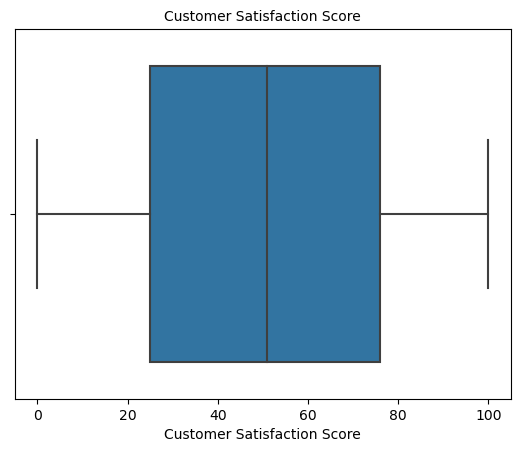

In [175]:
#Box plot showing Customer Satisfaction Score data
sns.boxplot(x = "Customer Satisfaction Score", data=customer_df, hue ="Customer Satisfaction Score")
plt.title('Customer Satisfaction Score', fontsize=10)
plt.legend([], [], frameon=False)
plt.show()

In [177]:
#Pie chart for Preferred Communication Channel
Communication_counts = customer_df["Preferred Communication Channel"].value_counts()
Communication_PROB = Communication_counts/len(customer_df)
Communication_PROB

Preferred Communication Channel
Email    0.381125
SMS      0.348750
Phone    0.270125
Name: count, dtype: float64

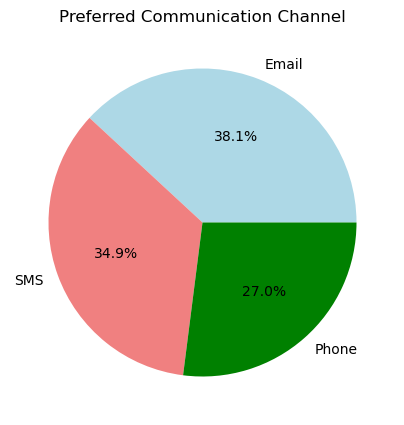

In [181]:
# Preparing the data
communication_proportions = {'Email': 0.381125, 'SMS': 0.348750, 'Phone': 0.270125}

# Labels and values for the pie chart
labels = communication_proportions.keys()
sizes = communication_proportions.values()

# Plot
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'green'])
plt.title('Preferred Communication Channel')
plt.show()

In [76]:
#Calculating the mode of Preferred Communication Channel
mode = customer_df["Preferred Communication Channel"].mode()
mode

0    Email
Name: Preferred Communication Channel, dtype: object

In [77]:
#Calculating the mode of Customer Satisfaction Score
mode1 = customer_df["Customer Satisfaction Score"].mode()
mode1

0    80
Name: Customer Satisfaction Score, dtype: int64

In [78]:
#Calculating the mode of Account Age
mode2 = customer_df["Account Age"].mode()
mode2

0    70
Name: Account Age, dtype: int64

for customer retention having a look at the satisfaction of customers could be useful. Customers who have a satisaction score of under 50 could be sent discounts or more benefical marketing promotions.

In [80]:
#Variation coefficient of Marketing email click rate
mu = 49.413815
sigma = 28.729436

sigma/mu * 100

58.14049370606176

In [16]:
#how many customers gave a product rating between 3-5
mu = 2.992875
sigma = 1.160277
norm.cdf(5, mu, sigma) - norm.cdf(3, mu, sigma)

0.4557231886212574

In [17]:
#Transaction Amount
mu = 50.281659
sigma = 27.280464
norm.cdf(100, mu, sigma) - norm.cdf(75, mu, sigma)

0.1482557675329642

In [18]:
#49.7% of customers have a satisfaction score of under 50/100
mu = 50.21
sigma = 29.98
norm.cdf(50, mu, sigma)

0.4972055639162718

In [19]:
#Marketing email click rate
mu = 49.413815
sigma = 28.729436
norm.cdf(100, mu, sigma) - norm.cdf(75, mu, sigma)

0.14743632578532972

In [20]:
#newletter open rate
mu = 49.759737
sigma = 28.961474
norm.cdf(80, mu, sigma) - norm.cdf(40, mu, sigma)

0.4837310288355364

[Text(0.5, 0, 'Score'),
 Text(0, 0.5, 'Customers'),
 Text(0.5, 1.0, 'Customer Satisfaction Scores')]

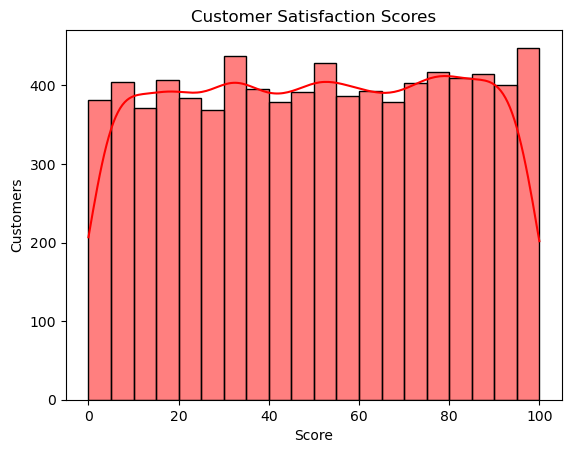

In [21]:
ax = sns.histplot(customer_df["Customer Satisfaction Score"], kde=True, color ='red')
ax.set(xlabel='Score', ylabel='Customers', title ='Customer Satisfaction Scores')

[Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'No. of Customers'),
 Text(0.5, 1.0, 'Product Rating')]

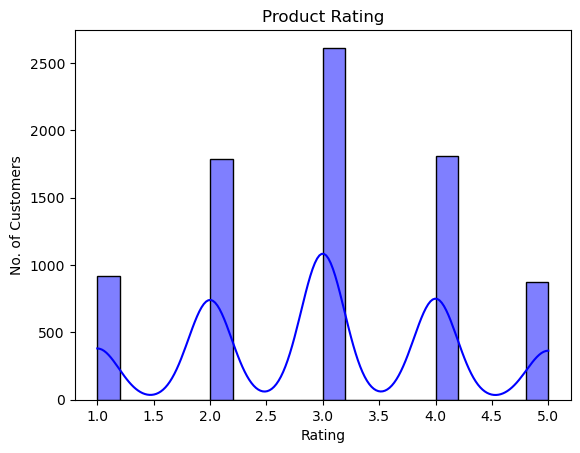

In [22]:
ax = sns.histplot(customer_df["Product Rating"], kde=True, color ='blue')
ax.set(xlabel='Rating', ylabel='No. of Customers', title ='Product Rating')

[Text(0.5, 0, 'Account Age'),
 Text(0, 0.5, 'No. of Customers'),
 Text(0.5, 1.0, 'Amount Spent in USD')]

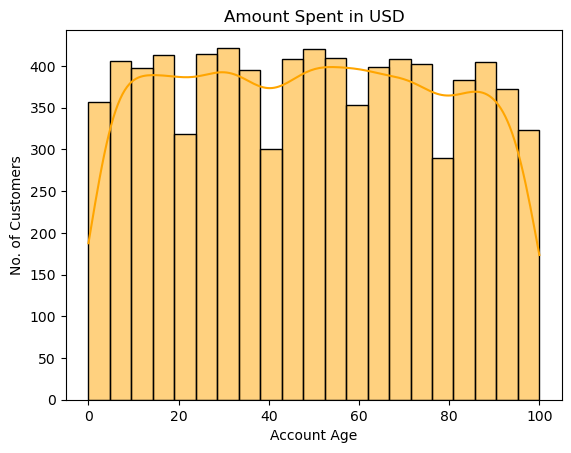

In [182]:
ax = sns.histplot(customer_df["Account Age"], kde=True, color ='orange')
ax.set(xlabel='Account Age', ylabel='No. of Customers', title ='Amount Spent in USD')

QUESTION 3 - Probabilities

In [88]:
#Establishing how customers have each product category
productType_counts = customer_df["Product Category Preference"].value_counts()
productType_counts

Product Category Preference
Gold        3162
Platinum    2783
Basic       2055
Name: count, dtype: int64

In [91]:
#converting to percentage or probibility
productType_counts_PROB = productType_counts/len(customer_df)
productType_counts_PROB

Product Category Preference
Gold        0.395250
Platinum    0.347875
Basic       0.256875
Name: count, dtype: float64

In [85]:
#Establishing how customers have membership
Membership_counts = customer_df["Membership Status"].value_counts()
Membership_counts

Membership Status
Yes    7895
No      105
Name: count, dtype: int64

In [86]:
#converting to percentage or probibility
Membership_PROB = Membership_counts/len(customer_df)
Membership_PROB

Membership Status
Yes    0.986875
No     0.013125
Name: count, dtype: float64

In [73]:
#Establishing how customers have interst in new products and converting to percentage/ probibility
ProductInterest_counts = customer_df["Interest in New Product"].value_counts()
ProductInterest_PROB = ProductInterest_counts/len(customer_df)
ProductInterest_PROB

Interest in New Product
Yes    0.506125
No     0.493875
Name: count, dtype: float64

QUESTION 4 BINOMIAL DUSTRIBUTION - INTEREST IN NEW PRODUCT. Can use above data ^^

BIMON.PMF (K = NUMBER WE ARE LOOKING FOR, N = SAMPLE SIZE, P = PROBABILIITY)

In [37]:
#Probibility for customers having an interest in new products
8000*0.506125

4049.0000000000005

In [183]:
#Establishing how customers in each segment
Customer_counts1 = customer_df["Customer Segment Group"].value_counts()
Customer_counts1

Customer Segment Group
B    2028
A    1998
D    1996
C    1978
Name: count, dtype: int64

In [35]:
#Calculating 5% of segmant A
1998 * 0.05

99.9

Calculating Binomial Probabilities for segment A.

Probibility of 70 customers

In [104]:
#Probibilty of more then 70
binom.sf(70, 200, 0.506125)

0.9999938897446935

In [105]:
#Probibilty of less then 70
binom.cdf(70, 200, 0.506125)

6.110255306545483e-06

In [122]:
#Probibilty of between 30 - 70
binom.cdf(70, 200, 0.506125)-binom.cdf(30, 200, 0.506125)

6.110255306545483e-06

Probibility of 60 customers

In [101]:
#Probibilty of more then 60
binom.sf(60, 100, 0.506125)

0.9999999972606811

In [119]:
#Probibilty of less then 60
binom.cdf(60, 100, 0.506125)

0.9763562988402331

In [123]:
#Probibilty of between 40 - 60
binom.cdf(60, 100, 0.506125)-binom.cdf(40, 100, 0.506125)

0.955006424528501

Probibility of 50

In [113]:
#Probibilty of more then 50
binom.sf(50, 100, 0.506125)

0.50913205247736

In [114]:
#Probibilty of less then 50
binom.cdf(50, 100, 0.506125)

0.49086794752263996

In [115]:
#Probibilty of exactly 50
binom.pmf(50, 100, 0.506125)

0.07899425963507985

Probibility of 40

In [116]:
#Probibilty of more then 40
binom.sf(40, 100, 0.506125)

0.9786501256882679

In [117]:
#Probibilty of less then 40
binom.cdf(40, 100, 0.506125)

0.02134987431173205

In [118]:
#Probibilty of exactly 40
binom.pmf(40, 100, 0.506125)

0.00842399091099378

QUESTION 5 - NORMAL DISTRIBUTION

[Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'No. of Customers'),
 Text(0.5, 1.0, 'Transaction Amount')]

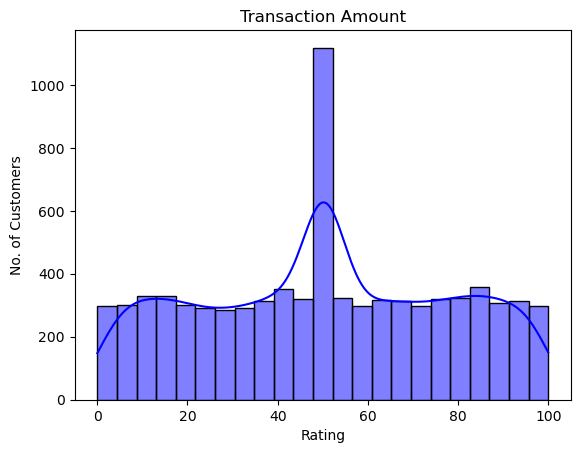

In [64]:
#Histogram for transaction amount
ax = sns.histplot(customer_df["Transaction Amount"], kde=True, color ='blue')
ax.set(xlabel='Rating', ylabel='No. of Customers', title ='Transaction Amount')

In [65]:
#Transaction Amount - people spending between 100 and 75 usd
mu = 50.281659
sigma = 27.280464
norm.cdf(100, mu, sigma) - norm.cdf(75, mu, sigma)

0.1482557675329642

In [68]:
#Transaction Amount - people spending upto 50 usd
mu = 50.281659
sigma = 27.280464
norm.cdf(60, mu, sigma) - norm.cdf(30, mu, sigma)

0.41056421103118385

In [69]:
#Transaction Amount - people spending upto 50 usd
mu = 50.281659
sigma = 27.280464
norm.cdf(30, mu, sigma)

0.2286046629261465

In [152]:
#Transaction Amount - people spending upto 50 usd
mu = 50.281659
sigma = 27.280464
norm.cdf(50, mu, sigma)

0.49588116655619724

In [160]:
#We define the range for the IQ values
x = np.linspace(0, 100, 1000)
#x = np.linspace(the first value of the variable, the last value of the variable, the number of values that we ask python to calculate the probability)

#We calculate the probability distribution function for these values

pdf_values = norm.pdf(x, mu, sigma)

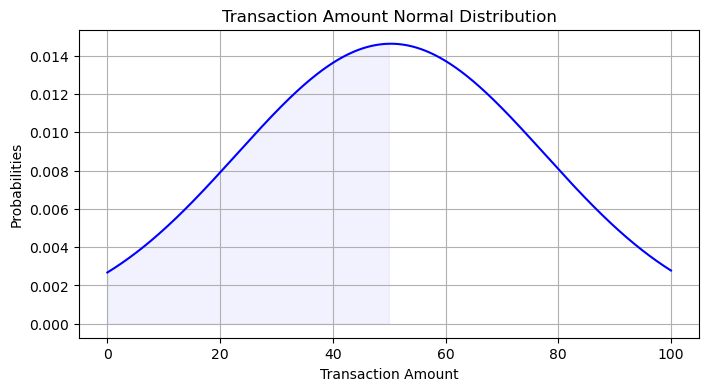

In [161]:
#We create the visualisation

plt.figure(figsize=(8,4))
plt.plot(x, pdf_values, label = customer_df["Transaction Amount"], color = 'blue')

#We will mark x <50

plt.fill_between(x, pdf_values, where = (x<50), color = 'blue', alpha = 0.05, label = 'IQ <50')

plt.title('Transaction Amount Normal Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Probabilities')
plt.grid(True)
plt.show()